In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
past_data = pd.read_csv('INNHotelsGroup_pastdata.csv')
new_data = pd.read_csv('INNHotelsGroup_newdata.csv')

In [3]:
past_data.shape

(27093, 12)

In [4]:
new_data.shape

(3583, 11)

### Descriptive Statistics

In [5]:
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [6]:
past_data.describe(include='object').T

,count,unique,top,freq
booking_id,27093,27093,INNHG_101034,1
market_segment_type,27093,2,Online,18456
arrival_date,27093,439,2021-03-19,279
booking_status,27093,2,Not Canceled,18236
rebooked,8857,2,No,7092


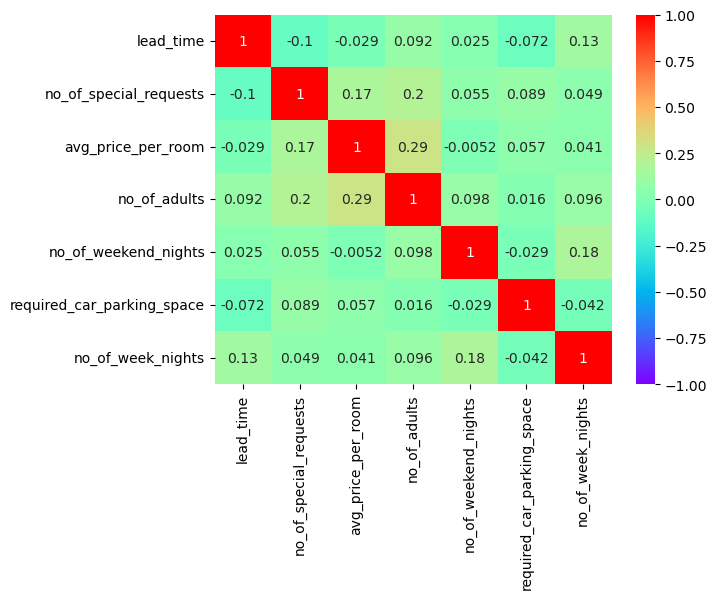

In [7]:
# Correlation heat map
sns.heatmap(past_data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='rainbow')
plt.show()

In [8]:
# We need to assing correct datatypes to columns
past_data.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
rebooked                       object
dtype: object

In [9]:
actual_y = new_data['booking_status']

In [10]:
new_data.drop(columns=['booking_status'],inplace=True)

In [11]:
new_data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2


In [12]:
data = pd.concat([past_data,new_data],axis=0)

In [13]:
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,NaN,NaN
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,NaN,NaN
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN,NaN
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN,NaN


In [14]:
# Change the data type of arrival date to datetime
data['arrival_date']=pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [15]:
data.dtypes

booking_id                            object
lead_time                              int64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
rebooked                              object
dtype: object

In [16]:
data['Arrival_day'] = data['arrival_date'].dt.day
data['Arrival_month'] = data['arrival_date'].dt.month
data['Arrival_weekday'] = data['arrival_date'].dt.weekday

In [17]:
data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,Arrival_day,Arrival_month,Arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4


In [18]:
# Drop Booking ID and Arrival Date

In [19]:
data.drop(columns=['booking_id','arrival_date'],inplace=True)

In [20]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,rebooked,Arrival_day,Arrival_month,Arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,NaN,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,NaN,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,NaN,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,NaN,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,No,1,1,4


### Data Analysis

In [21]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'rebooked', 'Arrival_day', 'Arrival_month', 'Arrival_weekday'],
      dtype='object')

In [22]:
num_cols = ['lead_time','avg_price_per_room','Arrival_day']
cat_cols = ['market_segment_type','no_of_special_requests',
            'no_of_adults','no_of_weekend_nights',
            'required_car_parking_space','no_of_week_nights',
            'booking_status','rebooked','Arrival_month','Arrival_weekday']

#### Univariate Analysis

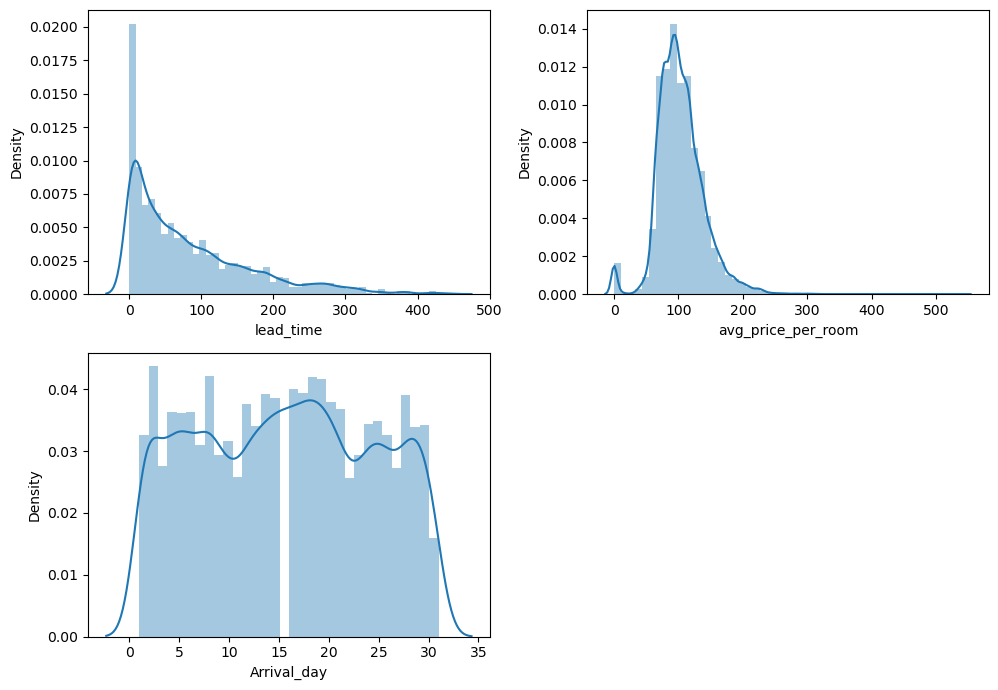

In [23]:
t =1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

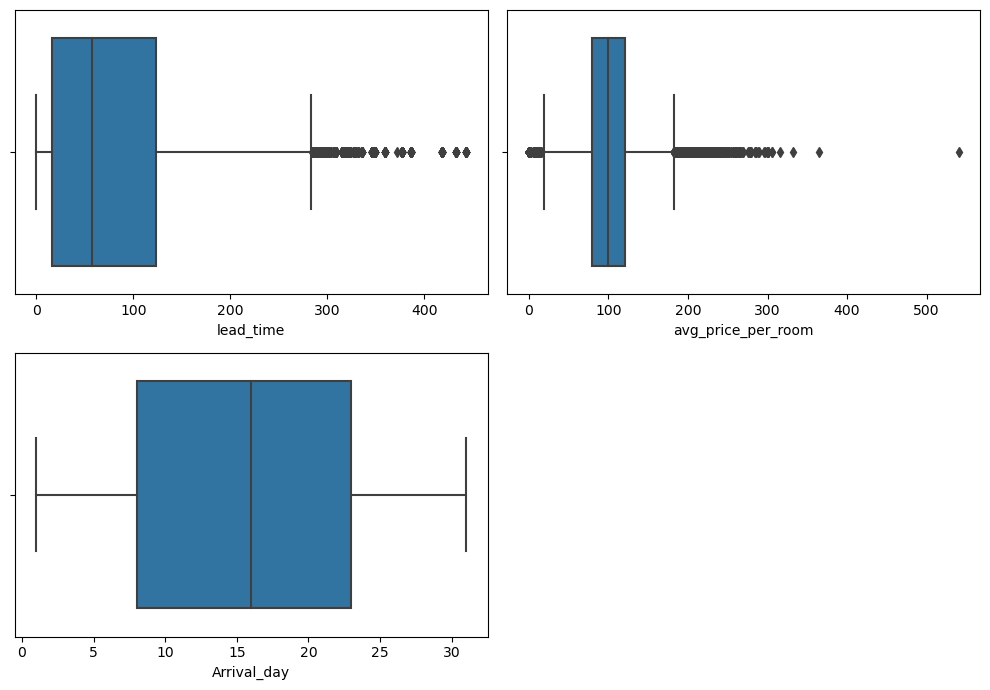

In [28]:
t =1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [31]:
len(cat_cols)

10

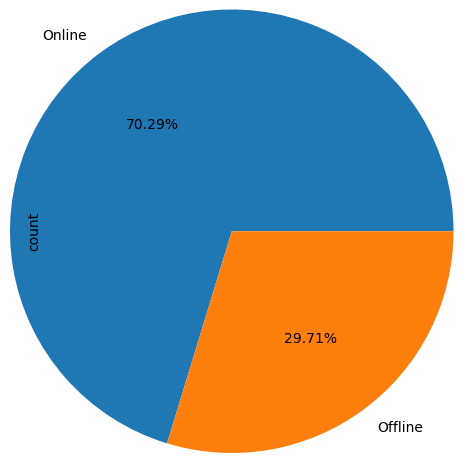

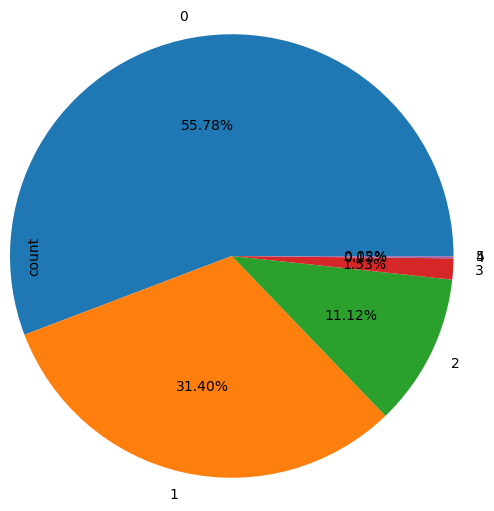

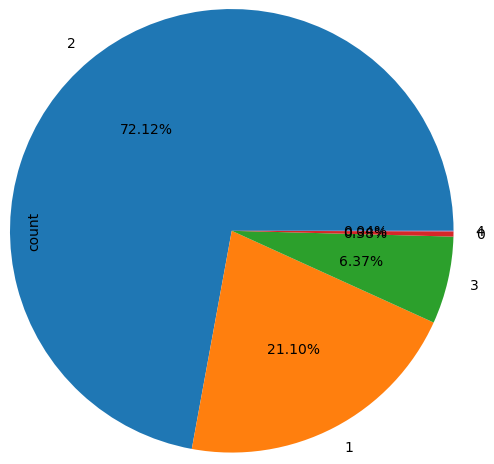

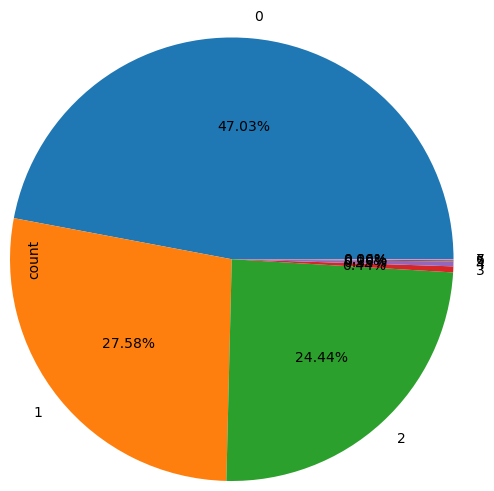

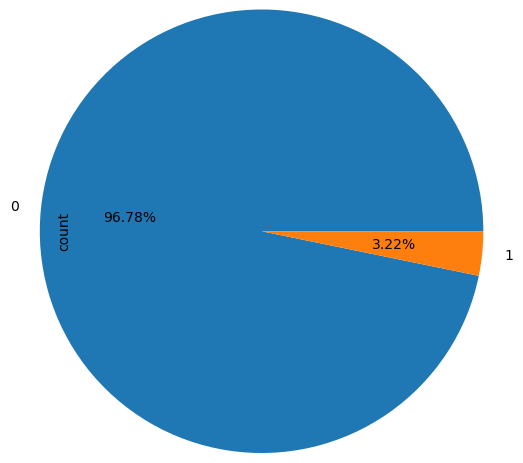

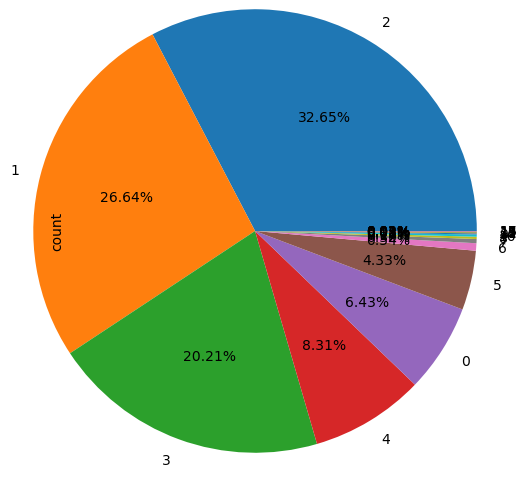

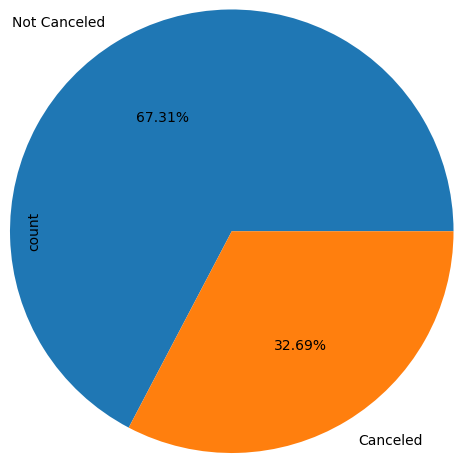

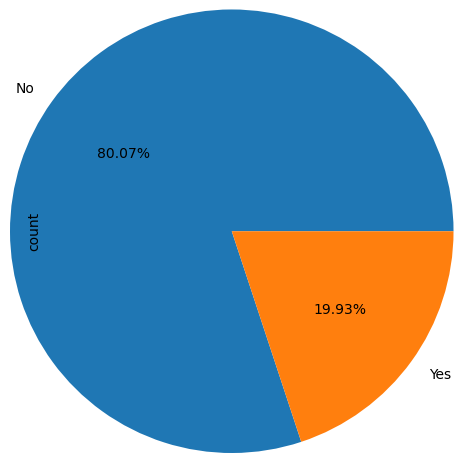

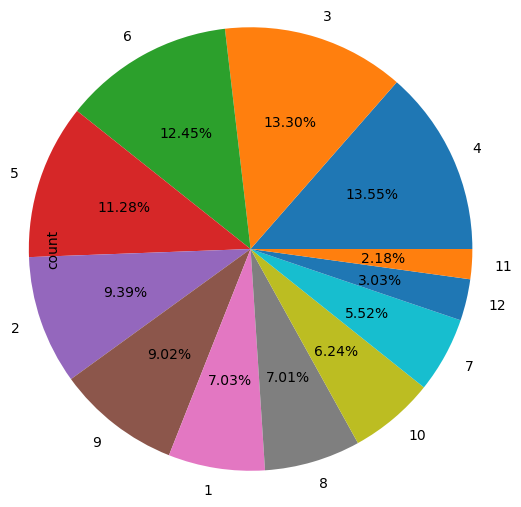

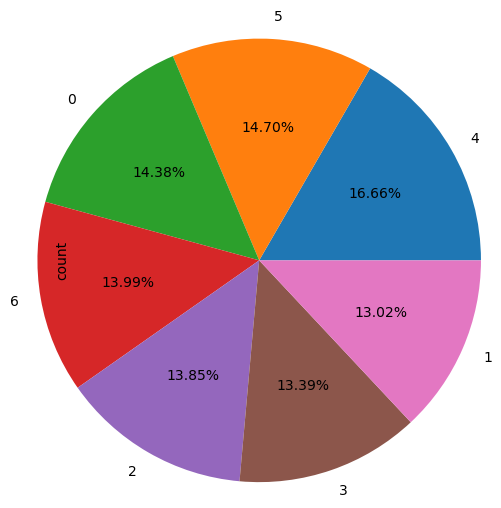

In [39]:
for i in cat_cols:
    data[i].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.5)
    plt.show()

In [133]:
# Explore rebooked data

In [134]:
data.groupby(by=['booking_status','rebooked'])['rebooked'].count()

booking_status  rebooked
Canceled        No          7092
                Yes         1765
Name: rebooked, dtype: int64

In [135]:
data['rebooked'].value_counts(normalize=True)

rebooked
No     0.800723
Yes    0.199277
Name: proportion, dtype: float64

<Axes: xlabel='booking_status'>

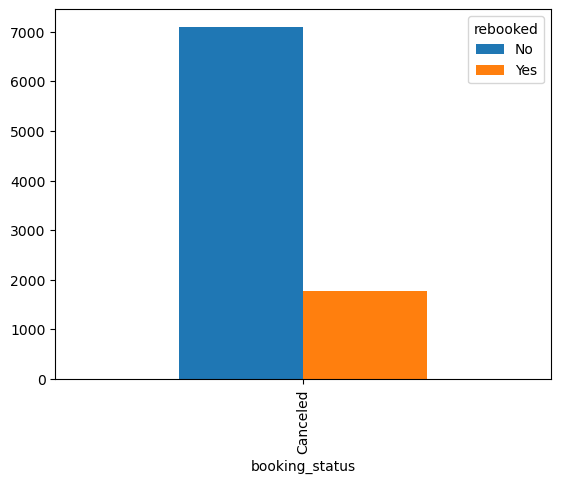

In [136]:
pd.crosstab(data['booking_status'],data['rebooked']).plot(kind='bar')

#### Bivariate Analysis

In [137]:
# Num vs category

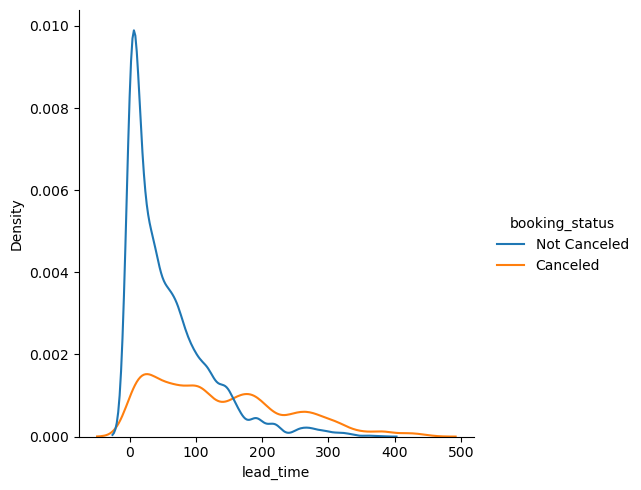

In [138]:
sns.displot(x=data['lead_time'],kind='kde',hue=data['booking_status'])

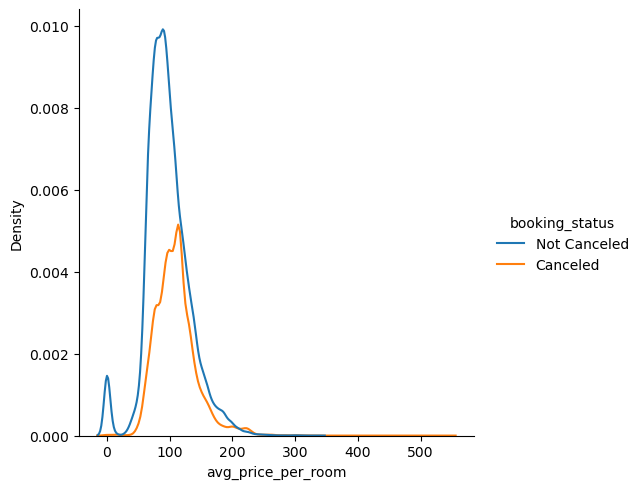

In [139]:
sns.displot(x=data['avg_price_per_room'],kind='kde',hue=data['booking_status'])

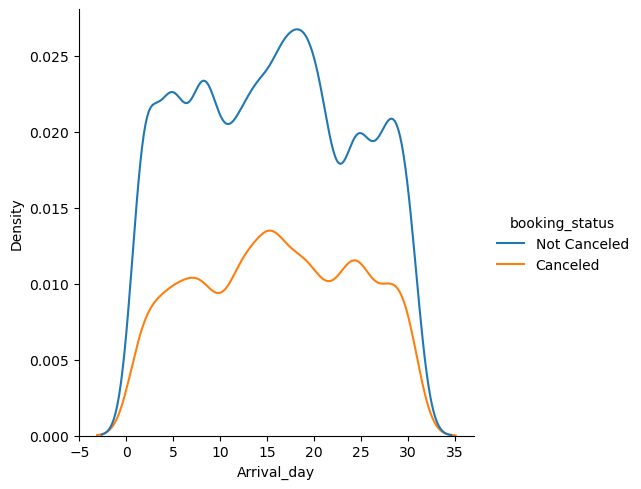

In [140]:
sns.displot(x=data['Arrival_day'],kind='kde',hue=data['booking_status'])

In [141]:
sns.__version__

'0.12.2'

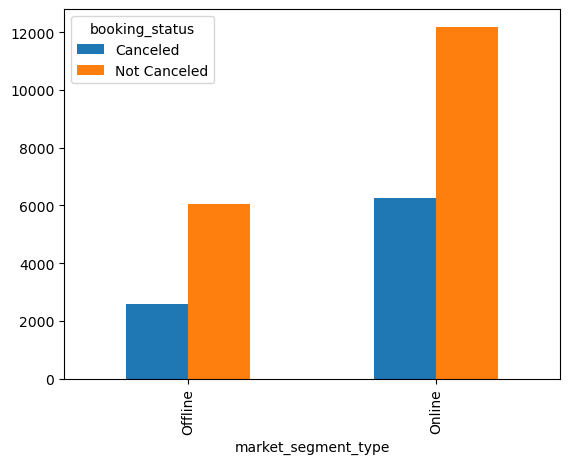

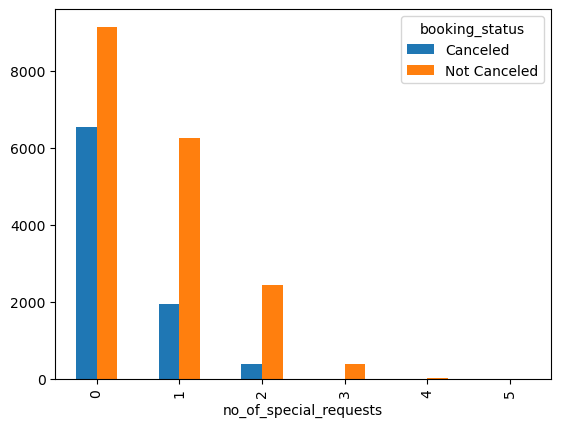

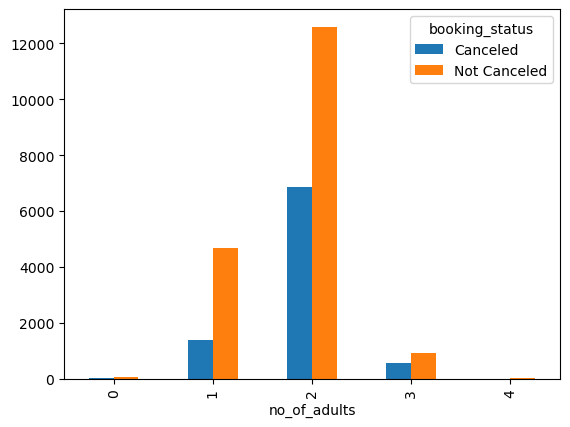

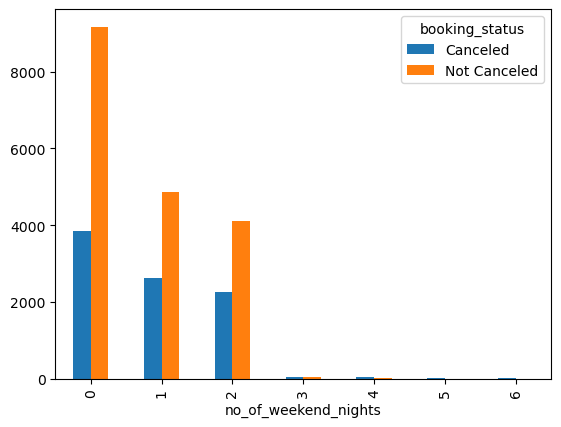

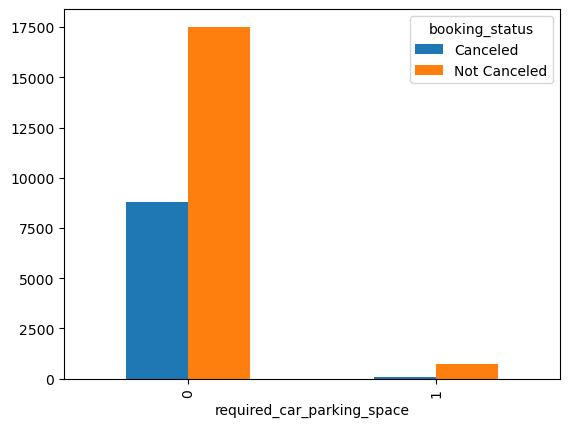

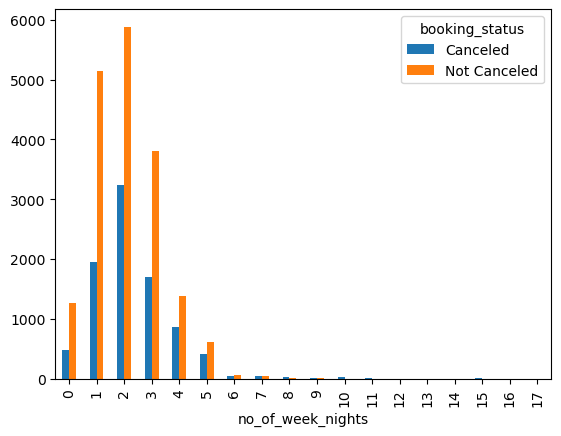

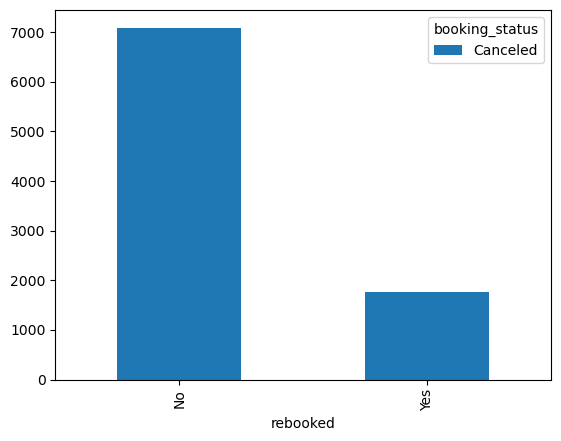

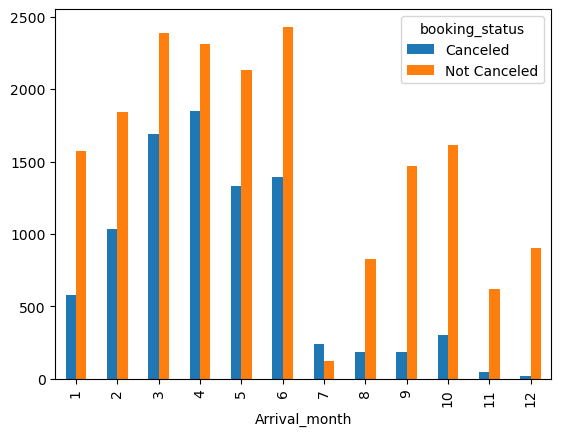

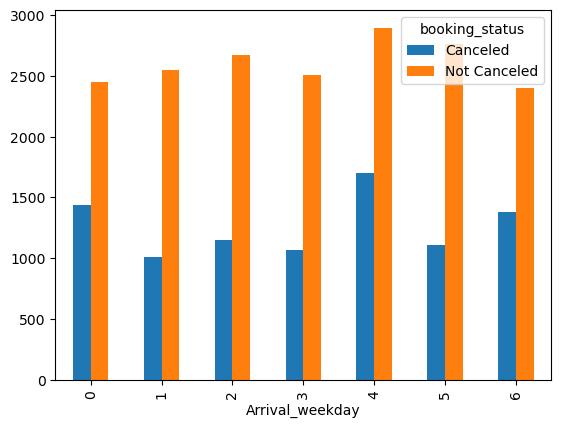

In [142]:
# Cat vs Cat (Grouped Bar Plot)
for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

#### Statistical Analysis (Inferential Statistics)

In [143]:
# Num Vs Cat

In [144]:
import scipy.stats as stats

In [145]:
num_cols

['lead_time', 'avg_price_per_room', 'Arrival_day']

In [146]:
# two sample t_test/ Mannwhitneyu
# Ho: There is no relation between num col and booking status (Mu1 = Mu2)
# Ha: There is relation between num col and booking status (Mu1 != Mu2)

In [147]:
# Assumptions (Normality)
print(stats.shapiro(data['lead_time']))
print(stats.shapiro(data['avg_price_per_room']))
print(stats.shapiro(data['Arrival_day']))

ShapiroResult(statistic=0.858092188835144, pvalue=0.0)
ShapiroResult(statistic=0.9544830918312073, pvalue=0.0)
ShapiroResult(statistic=0.9567803740501404, pvalue=0.0)


In [148]:
for i in num_cols:
    samp1 = data[data['booking_status']=='Not Canceled'][i]
    samp2 = data[data['booking_status']=='Canceled'][i]
    print(i,':',stats.mannwhitneyu(samp1,samp2)[1])

lead_time : 0.0
avg_price_per_room : 4.950381137183313e-216
Arrival_day : 2.5710270847504093e-07


In [149]:
# All the p_values are less than 0.05 hence we reject Ho:

In [150]:
# Cat vs cat

In [151]:
# Ho: categories have no relation
# Ha: Categories have relation
for i in cat_cols:
    if i != 'booking_status':
        table = pd.crosstab(data[i],data['booking_status'])
        print(i,':',stats.chi2_contingency(table)[1])

market_segment_type : 7.806389643886697e-11
no_of_special_requests : 0.0
no_of_adults : 1.4411855115006094e-73
no_of_weekend_nights : 5.324997086476798e-43
required_car_parking_space : 5.626905783478662e-49
no_of_week_nights : 7.318602549508705e-65
rebooked : 1.0
Arrival_month : 0.0
Arrival_weekday : 2.0528217585454624e-36


### Data Preprocessing

In [152]:
# We cannot include rebooking feature in model as, this information is 
# only available when the booking has been canceled, which we have to
# predict.
data.drop(columns=['rebooked'],inplace=True)

In [153]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,Arrival_day,Arrival_month,Arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


#### Missing Values

In [154]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
Arrival_day                      0
Arrival_month                    0
Arrival_weekday                  0
dtype: int64

In [155]:
# There are no missing values

#### Outlier Treatment

In [156]:
train = data[data['booking_status'].notnull()]
test = data[data['booking_status'].isnull()]

In [157]:
train.shape

(27093, 12)

In [158]:
test.shape

(3583, 12)

In [159]:
# Remove/ capping the outliers
for i in num_cols:
    q1,q3 = np.quantile(train[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr, q1-2.5*iqr
    train[i] = np.where(train[i]>ul,ul,train[i])
    train[i] = np.where(train[i]<ll,ll,train[i])

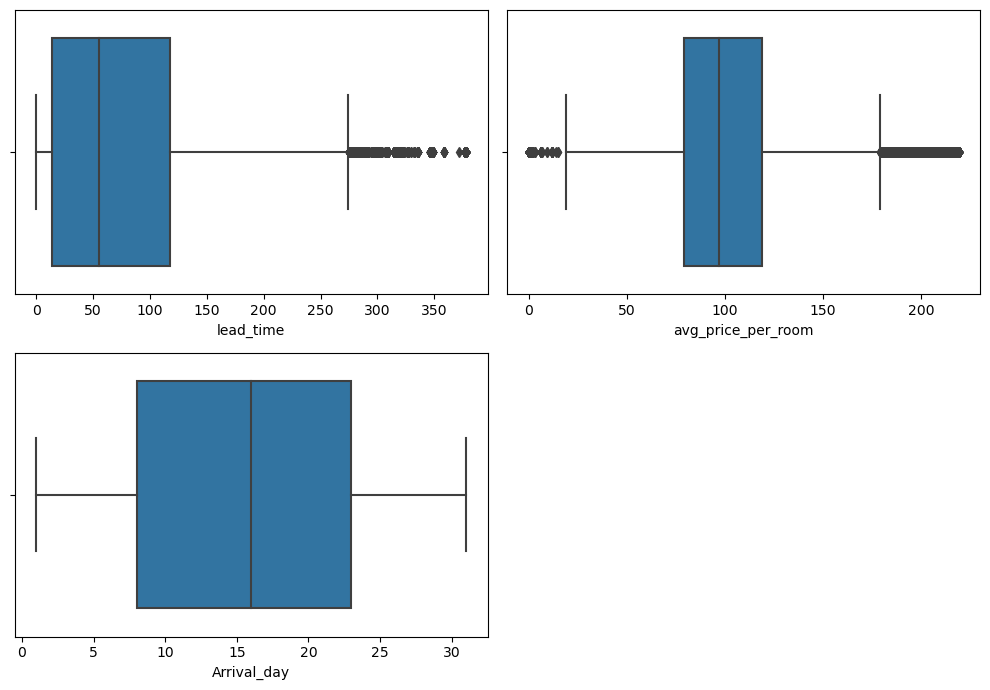

In [160]:
t =1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=train[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

#### Encoding

In [161]:
train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,Arrival_day,Arrival_month,Arrival_weekday
0,0.0,Online,0,85.03,1,1,0,0,Not Canceled,1.0,1,4
1,34.0,Online,2,125.10,2,2,0,0,Not Canceled,1.0,1,4


In [162]:
train['booking_status']  = train['booking_status']\
.map({'Canceled':1,'Not Canceled':0})


In [163]:
train = pd.get_dummies(train,drop_first=True,dtype=int)
test = pd.get_dummies(test,drop_first=True,dtype=int)

In [164]:
train.shape

(27093, 12)

In [165]:
test.shape

(3583, 11)

#### Train test split

In [166]:
x_test = test
y_test = actual_y.map({'Canceled':1,'Not Canceled':0})

x_train = train.drop(columns=['booking_status'])
y_train = train['booking_status']

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,Arrival_day,Arrival_month,Arrival_weekday,market_segment_type_Online
0,4,1,103.00,1,0,1,1,1,7,4,1
1,147,2,103.70,2,2,0,2,1,7,4,1
2,43,1,126.90,2,1,1,2,1,7,4,1
3,145,0,72.76,2,0,0,1,1,7,4,0
4,86,1,107.69,2,1,0,2,1,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...
3578,258,1,106.20,2,0,0,1,29,9,3,1
3579,263,0,100.30,2,2,0,4,29,9,3,1
3580,185,2,116.10,2,2,0,3,29,9,3,1
3581,214,0,120.90,2,0,0,3,29,9,3,1


In [68]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27093, 11) (27093,) (3583, 11) (3583,)


### Predictive Modelling

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier

from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [70]:
mod = []
accu = []
prec = []
rec = []
f1 = []
kappa = []


def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]
    
    print('Confusion Matrix\n',confusion_matrix(ytest,pred_h))
    print('Classification Report\n',classification_report(ytest,pred_h))
    
    fpr,tpr,thresh = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    response = input('Do you want to save a model Y/N?')
    
    if response.lower()=='y':
        global scorecard
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kappa.append(cohen_kappa_score(ytest,pred_h))

        scorecard = pd.DataFrame({'Model':mod,
                                 'Accuracy':accu,
                                 'Precision':prec,
                                 'Recall':rec,
                                 'F1 Score':f1,
                                 'Cohen Kappa':kappa})
    else:
        return

### Logistic regression

Confusion Matrix
 [[2166  217]
 [ 587  613]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      2383
           1       0.74      0.51      0.60      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.71      0.72      3583
weighted avg       0.77      0.78      0.76      3583



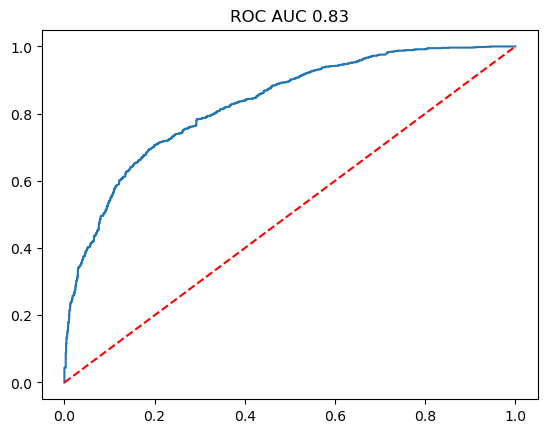

Do you want to save a model Y/N?y


In [71]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [72]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561


### Naive Bayes

Confusion Matrix
 [[1917  466]
 [ 518  682]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      2383
           1       0.59      0.57      0.58      1200

    accuracy                           0.73      3583
   macro avg       0.69      0.69      0.69      3583
weighted avg       0.72      0.73      0.72      3583



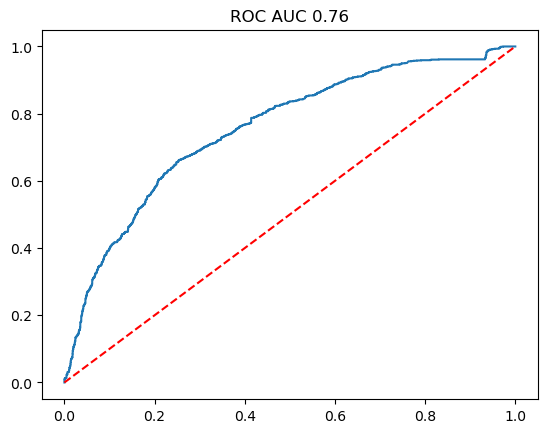

Do you want to save a model Y/N?y


In [73]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

In [74]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835


### Decision Tree

Confusion Matrix
 [[2158  225]
 [ 355  845]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.79      0.70      0.74      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.80      0.81      3583
weighted avg       0.84      0.84      0.84      3583



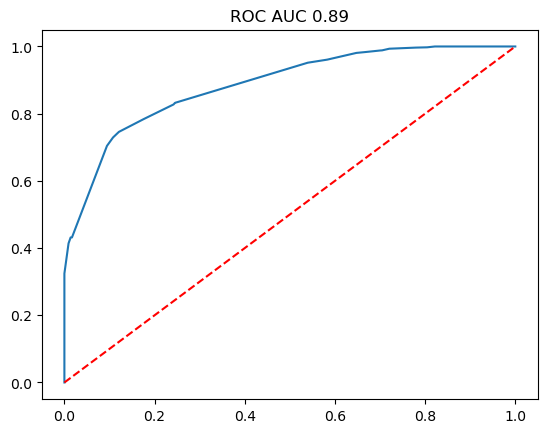

Do you want to save a model Y/N?y


In [75]:
model_validation(DecisionTreeClassifier(max_depth=5),
                x_train,y_train,x_test,y_test)

In [76]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597


### Bagging Classifier/ Random Forest

Confusion Matrix
 [[2157  226]
 [ 347  853]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.79      0.71      0.75      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.81      0.82      3583
weighted avg       0.84      0.84      0.84      3583



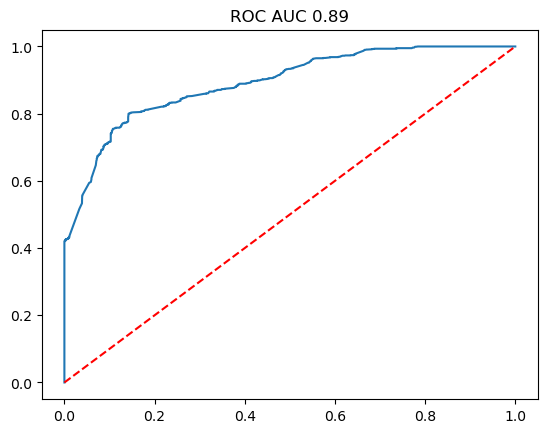

Do you want to save a model Y/N?y


In [77]:
model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),
                x_train,y_train,x_test,y_test)

In [78]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808


### Adaboost

Confusion Matrix
 [[2118  265]
 [ 466  734]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2383
           1       0.73      0.61      0.67      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.75      0.76      3583
weighted avg       0.79      0.80      0.79      3583



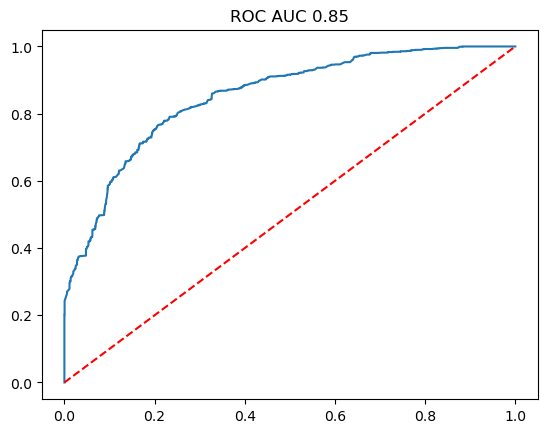

Do you want to save a model Y/N?y


In [79]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),
                x_train,y_train,x_test,y_test)

In [80]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172


### Gradient Boosting

Confusion Matrix
 [[1859  524]
 [ 283  917]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      2383
           1       0.64      0.76      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.76      3583
weighted avg       0.79      0.77      0.78      3583



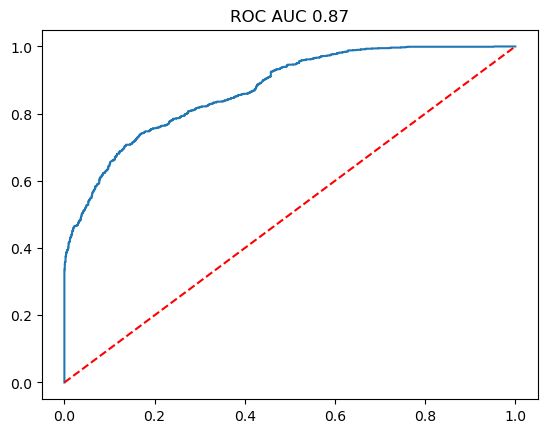

Do you want to save a model Y/N?y


In [81]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=100),
                x_train,y_train,x_test,y_test)

In [82]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.774770,0.636364,0.764167,0.694434,0.518432


### XGBoost

Confusion Matrix
 [[2062  321]
 [ 348  852]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      2383
           1       0.73      0.71      0.72      1200

    accuracy                           0.81      3583
   macro avg       0.79      0.79      0.79      3583
weighted avg       0.81      0.81      0.81      3583



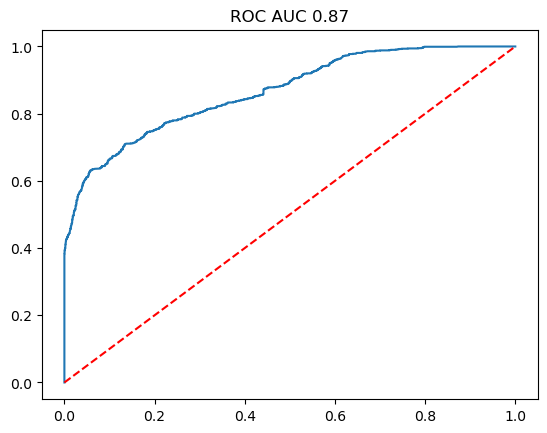

Do you want to save a model Y/N?y


In [83]:
model_validation(XGBClassifier(n_estimators=250,learning_rate=0.01,max_depth=7),
                 x_train,y_train,x_test,y_test)

In [84]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.774770,0.636364,0.764167,0.694434,0.518432
6,"XGBClassifier(base_score=None, booster=None, c...",0.813285,0.726343,0.710000,0.718078,0.578527


### Voting

In [85]:
base_estimators = [('Decision Tree 1',DecisionTreeClassifier(max_depth=7)),
                   ('Decision Tree 2',DecisionTreeClassifier(max_depth=5)),
                  ('Random Forest 1',RandomForestClassifier(n_estimators=150,max_depth=5)),
                   ('Random Forest 2',RandomForestClassifier(n_estimators=200,max_depth=7)),
                  ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [86]:
vc = VotingClassifier(estimators=base_estimators,voting='soft')

In [87]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Decision Tree 1',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Decision Tree 2',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest 1',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('Random Forest 2',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=200)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            co...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

Confusion Matrix
 [[2195  188]
 [ 354  846]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2383
           1       0.82      0.70      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.81      0.82      3583
weighted avg       0.85      0.85      0.85      3583



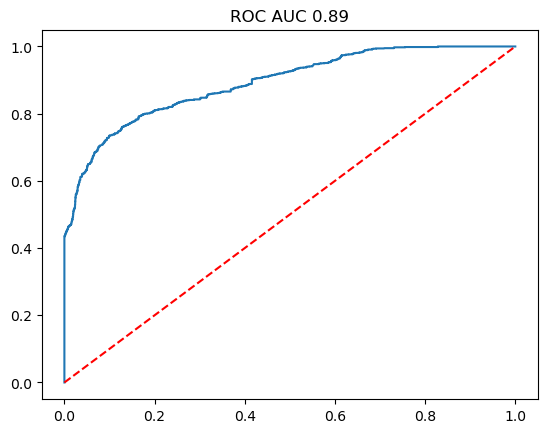

Do you want to save a model Y/N?y


In [88]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),
                x_train,y_train,x_test,y_test)

In [89]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.774770,0.636364,0.764167,0.694434,0.518432
6,"XGBClassifier(base_score=None, booster=None, c...",0.813285,0.726343,0.710000,0.718078,0.578527
7,VotingClassifier(estimators=[('Decision Tree 1...,0.848730,0.818182,0.705000,0.757386,0.648371


### Stacking

In [90]:
base_estimators

[('Decision Tree 1', DecisionTreeClassifier(max_depth=7)),
 ('Decision Tree 2', DecisionTreeClassifier(max_depth=5)),
 ('Random Forest 1', RandomForestClassifier(max_depth=5, n_estimators=150)),
 ('Random Forest 2', RandomForestClassifier(max_depth=7, n_estimators=200)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
   

In [91]:
sc = StackingClassifier(estimators=base_estimators,
                       final_estimator=DecisionTreeClassifier(max_depth=5),
                       cv=7)

In [92]:
sc.fit(x_train,y_train)

StackingClassifier(cv=7,
                   estimators=[('Decision Tree 1',
                                DecisionTreeClassifier(max_depth=7)),
                               ('Decision Tree 2',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Random Forest 1',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=150)),
                               ('Random Forest 2',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=200)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=5))

Confusion Matrix
 [[2284   99]
 [ 584  616]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      2383
           1       0.86      0.51      0.64      1200

    accuracy                           0.81      3583
   macro avg       0.83      0.74      0.76      3583
weighted avg       0.82      0.81      0.79      3583



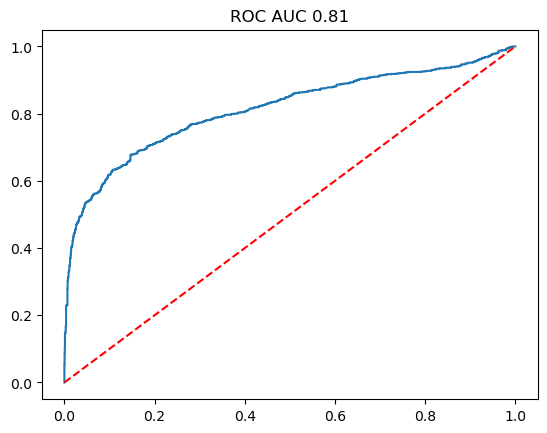

KeyboardInterrupt: Interrupted by user

In [93]:
model_validation(StackingClassifier(estimators=base_estimators,cv=7),
                x_train,y_train,x_test,y_test)

In [ ]:
scorecard

After comparing the score card Voting and Random forest gives best recall and F1 score. But in terms of complexity Random fores is less complex hence its execution will be fast. So we will go with Random forest for fine tuning and deployment.

### Fine Tune the final model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'n_estimators':[70,100,120],
        'max_features':[9,10,11],
        'max_depth':[7,8,9,10]}

In [ ]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param,scoring='f1',verbose=1,cv=4)

Confusion Matrix
 [[2147  236]
 [ 308  892]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      2383
           1       0.79      0.74      0.77      1200

    accuracy                           0.85      3583
   macro avg       0.83      0.82      0.83      3583
weighted avg       0.85      0.85      0.85      3583



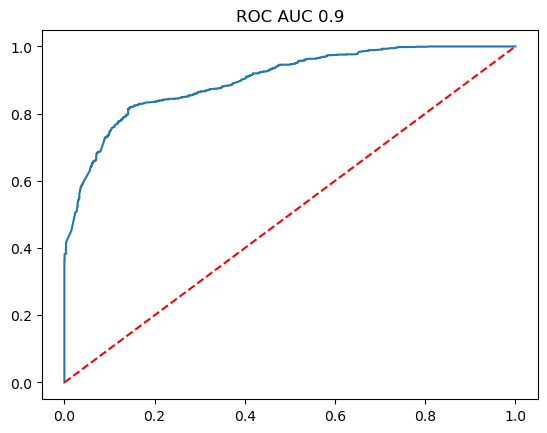

Do you want to save a model Y/N?y


In [95]:
model_validation(RandomForestClassifier(max_depth=6,max_features=11,n_estimators=150),
                x_train,y_train,x_test,y_test)

In [96]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.775607,0.738554,0.510833,0.603941,0.454561
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790547,0.710833,0.748574,0.631808
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.774770,0.636364,0.764167,0.694434,0.518432
6,"XGBClassifier(base_score=None, booster=None, c...",0.813285,0.726343,0.710000,0.718078,0.578527
7,VotingClassifier(estimators=[('Decision Tree 1...,0.848730,0.818182,0.705000,0.757386,0.648371
8,"RandomForestClassifier(max_depth=6, max_featur...",0.845381,0.786348,0.739167,0.762027,0.647680
9,"RandomForestClassifier(max_depth=6, max_featur...",0.848172,0.790780,0.743333,0.766323,0.654039


In [97]:
final_model = RandomForestClassifier(n_estimators=150,
                                    max_depth=6,
                                    max_features=11)

In [98]:
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=11, n_estimators=150)

In [99]:
pred_s = final_model.predict_proba(x_test)[:,1]

In [100]:
# Lets try to find out best cut off classifier using Yodens index

fpr,tpr,thres = roc_curve(y_test,pred_s)

In [101]:
pd.DataFrame({'FPR':fpr,
             'TPR':tpr,
             'Threshold':thres,
             "Yoden's Index":tpr*(1-fpr)}).sort_values(by="Yoden's Index",ascending=False)

,FPR,TPR,Threshold,Yoden's Index
318,0.139740,0.809167,0.359322,0.696094
325,0.143517,0.812500,0.340531,0.695893
323,0.142677,0.811667,0.342573,0.695860
316,0.139320,0.808333,0.367517,0.695716
317,0.139740,0.808333,0.365363,0.695377
...,...,...,...,...
935,0.991188,1.000000,0.000426,0.008812
936,0.992027,1.000000,0.000278,0.007973
937,0.997063,1.000000,0.000161,0.002937
0,0.000000,0.000000,inf,0.000000


In [102]:
pred_h = (pred_s>0.34).astype(int)

In [103]:
print(classification_report(y_test,pred_h))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2383
           1       0.74      0.81      0.77      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.83      0.83      3583
weighted avg       0.85      0.84      0.84      3583



### Prediction

In [104]:
x_train.head(2)

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,Arrival_day,Arrival_month,Arrival_weekday,market_segment_type_Online
0,0.0,0,85.03,1,1,0,0,1.0,1,4,1
1,34.0,2,125.10,2,2,0,0,1.0,1,4,1


In [105]:
final_model.predict_proba([[30,1,80,2,2,1,1,4,6,1,1]])[:,1]

array([0.15432093])

### Deployment

In [106]:
# Lets save the model
import pickle

In [107]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)